In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lineer Regresyon

In [20]:
simple_f = lambda x: 0.66 + 2.53*x + np.random.randn(*np.array(x).shape)
x = np.random.randn(150)
y = simple_f(x)

## bilinenler
- x
- y

**f(x) -> y fonksiyon bilinmiyor.**

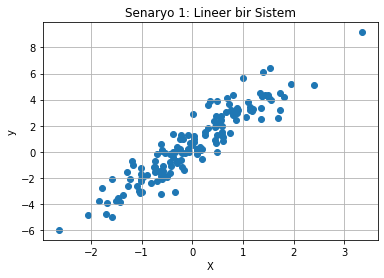

In [21]:
_ = plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Senaryo 1: Lineer bir Sistem')
_ = plt.grid()

In [22]:
x.shape

(150,)

In [23]:
y.shape

(150,)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
# fit
# transform
# predict
model.fit(
    x.reshape(-1, 1),
    y
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Katsayi ve intersept degeri ($ax + b = y$ | $a:coef\_,\ b:intercept\_$)

In [27]:
model.coef_

array([2.53181657])

In [28]:
model.intercept_

0.5495516297191331

In [29]:
xx = np.linspace(-3, 3, 100)
yy = model.predict(xx.reshape(-1, 1))

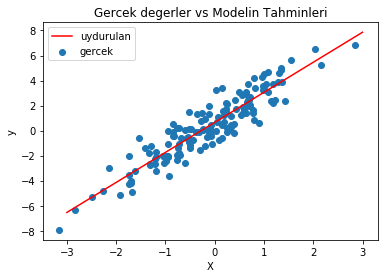

In [65]:
plt.scatter(x, y, label='gercek')
_ = plt.plot(xx, yy, 'r', label='uydurulan')
_ = plt.legend()
plt.xlabel('X')
plt.ylabel('y')
_ = plt.title('Gercek degerler vs Modelin Tahminleri')

In [66]:
y_pred = model.predict(x.reshape(-1, 1))

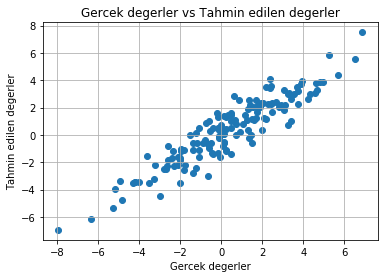

In [69]:
plt.scatter(y, y_pred)
plt.xlabel('Gercek degerler')
_ = plt.ylabel('Tahmin edilen degerler')
plt.grid()
_ = plt.title('Gercek degerler vs Tahmin edilen degerler')

In [70]:
modelin_hatasi = y - y_pred

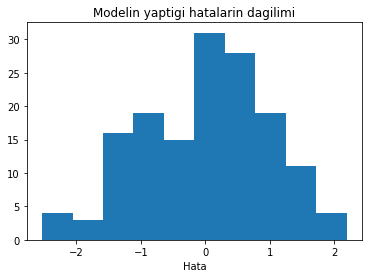

In [71]:
_ = plt.hist(-modelin_hatasi, bins=10)
plt.xlabel('Hata')
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

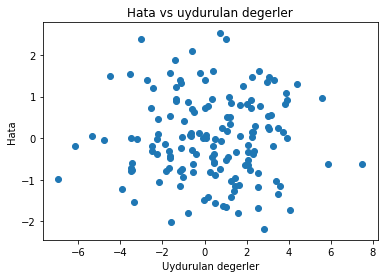

In [73]:
plt.scatter(y_pred, modelin_hatasi)
plt.title('Hata vs uydurulan degerler')
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

Grafikte herhangi bir patern gozlemlenmiyor.

## Polinomiyel Regresyon

Bu senaryoda $f(x)=y$ islemini gerceklestiren $f$ fonksiyonu polinomiyel bir fonksiyon:


$$f(x) = 0.66 + 2.53x - 1.2x^2 + \tilde{N}(0,1)$$

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = np.random.randn(150)
simple_f = lambda x: 0.66 + 2.53*x + -1.2*x**2 + np.random.randn(*np.array(x).shape)
y = simple_f(x)

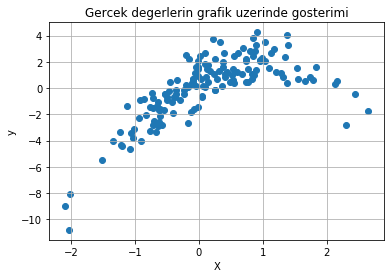

In [80]:
plt.scatter(x, y)
plt.grid()
plt.title('Gercek degerlerin grafik uzerinde gosterimi')
plt.xlabel('X')
_ = plt.ylabel('y')

In [81]:
model = LinearRegression()

In [82]:
# fit
# transform
# predict
model.fit(
    x.reshape(-1, 1),
    y
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
xx = np.linspace(-3, 3, 100)
yy = model.predict(xx.reshape(-1, 1))

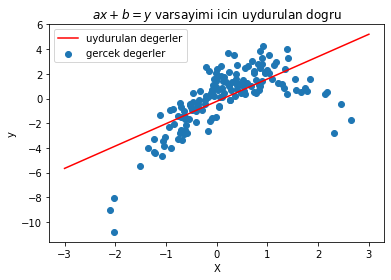

In [90]:
plt.scatter(x, y, label='gercek degerler')
plt.title('$ax + b = y$ varsayimi icin uydurulan dogru')
plt.xlabel('X')
plt.ylabel('y')
_ = plt.plot(xx, yy, 'r', label='uydurulan degerler')
_ = plt.legend()


In [91]:
y_pred = model.predict(x.reshape(-1, 1))

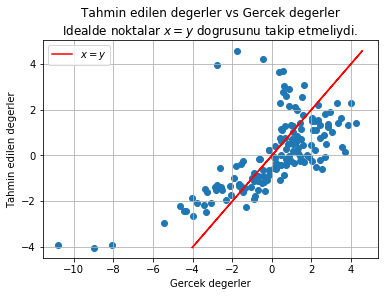

In [98]:
plt.scatter(y, y_pred)
plt.plot(y_pred, y_pred, color='red', label='$x=y$')
plt.xlabel('Gercek degerler')
plt.grid()
plt.legend()
plt.title('Tahmin edilen degerler vs Gercek degerler\nIdealde noktalar $x=y$ dogrusunu takip etmeliydi.')
_ = plt.ylabel('Tahmin edilen degerler')

In [99]:
modelin_hatasi = y - y_pred

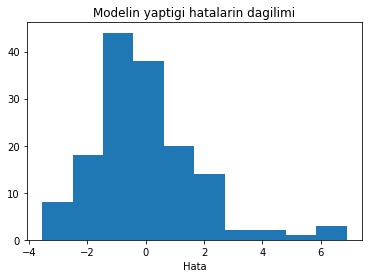

In [101]:
_ = plt.hist(-modelin_hatasi, bins=10)
plt.xlabel('Hata')
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

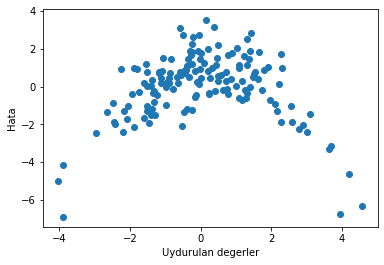

In [102]:
plt.scatter(y_pred, modelin_hatasi)
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

Grafikte acik bir sekilde patern gorulmektedir.
modelimizin varsayimlari hatali/yetersiz

In [28]:
DEG = 3
transformator = PolynomialFeatures(DEG, include_bias=False)

transformator.fit(x.reshape(-1, 1))
xp = transformator.transform(x.reshape(-1 , 1))

model_p = LinearRegression()

model_p.fit(xp, y)
model_p.score(xp, y)

0.9231473358953675

In [29]:
xx = np.linspace(x.min(), x.max(), 1000)
yy = model_p.predict(
    transformator.transform(xx.reshape(-1, 1))
                    )

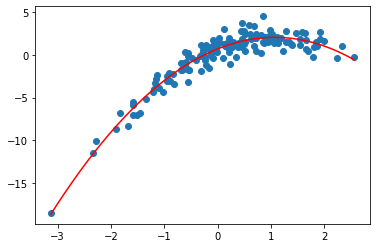

In [30]:
plt.scatter(x, y)
_ = plt.plot(xx, yy, color='red')

In [31]:
y_pred = model_p.predict(transformator.transform(x.reshape(-1, 1)))

In [32]:
# simple_f = lambda x: 0.66 + 2.53*x + -1.2*x**2 + np.random.randn(*np.array(x).shape)

In [33]:
model_p.coef_

array([ 2.53201837e+00, -1.18139034e+00, -1.56577539e-03])

In [34]:
model_p.intercept_

0.718017835779212

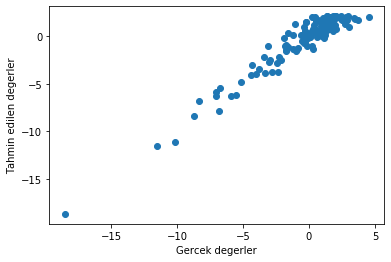

In [39]:
plt.scatter(y, y_pred)
plt.xlabel('Gercek degerler')
_ = plt.ylabel('Tahmin edilen degerler')

In [36]:
modelin_hatasi = y - y_pred

Text(0.5, 1.0, 'Modelin yaptigi hatalarin dagilimi')

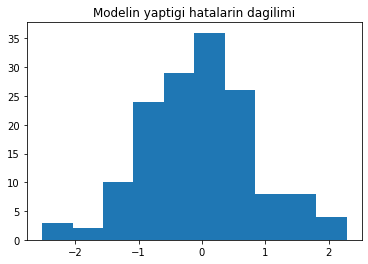

In [37]:
_ = plt.hist(-modelin_hatasi, bins=10)
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

Text(0, 0.5, 'Hata')

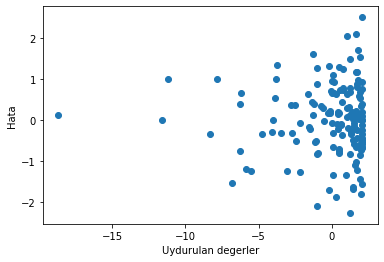

In [38]:
plt.scatter(y_pred, modelin_hatasi)
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

grafikte herhangi bir gozukmuyor; olumlu bir isaret.